# Laboratorio 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

En este laboratorio utilizaremos los mismos datos de diabetes vistos en la clase

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Pregunta 1

(1 pto)

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?
* ¿Crees que es necesario escalar o transformar los datos antes de comenzar el modelamiento?

__Respuesta:__

* Cada columna fue previamente normalizada a 1, por lo tanto los valores de esta columna que en principio eran 0 y 1, fueron reescalados para que la suma de cuadrados de todos los valores sea 1 y redistribuidos de manera que la media sea 0.
* La columna Target (medida cuantitativa de la progresión de la enfermedad un año después de la línea base, extracto de la clase M4L02).
* No es necesario otra transformación, la normalización ya hecha es la transformación tipica en este tipo de problemas, además no podemos transformar nuestros datos normalizados a datos "reales" sin tener información de estos (Seguramente se puede leyendo la documentación de los datos pero no lo revisé).

## Pregunta 2

(1 pto)

Realiza dos regresiones lineales con todas las _features_, el primer caso incluyendo intercepto y el segundo sin intercepto. Luego obtén la predicción para así calcular el error cuadrático medio y coeficiente de determinación de cada uno de ellos.

In [3]:
regr_with_intercept = linear_model.LinearRegression(fit_intercept=True)
regr_with_intercept.fit(diabetes_X, diabetes_y)

LinearRegression()

In [4]:
diabetes_y_pred_with_intercept = regr_with_intercept.predict(diabetes_X)

In [5]:
# Coeficientes
print(f"Coefficients: \n{regr_with_intercept.coef_}\n")
# Intercepto
print(f"Intercept: \n{regr_with_intercept.intercept_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y,diabetes_y_pred_with_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y,diabetes_y_pred_with_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Intercept: 
152.1334841628965

Mean squared error: 2859.69

Coefficient of determination: 0.52


In [6]:
regr_without_intercept = linear_model.LinearRegression(fit_intercept=False)
regr_without_intercept.fit(diabetes_X, diabetes_y)

LinearRegression(fit_intercept=False)

In [7]:
diabetes_y_pred_without_intercept = regr_without_intercept.predict(diabetes_X)
regr_without_intercept.intercept_

0.0

In [8]:
# Coeficientes
print(f"Coefficients: \n{regr_without_intercept.coef_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y,diabetes_y_pred_without_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y,diabetes_y_pred_without_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Mean squared error: 26004.29

Coefficient of determination: -3.39


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

__Respuesta:__ El ajuste lineal con intercepto es "decente" aunque el error cuadrático es aparentemente grande (no tengo referencia), so coeficiente de determinación nos dice que se puede establecer un ajuste lineal (aunque no muy bueno). El ajuste lineal sin intercepto parece ser bastante malo, sobre todo considerando su error cuadrático extremadamente alto y un coeficiente de determinación que nos indica que este ajuste no calza de ninguna manera.

## Pregunta 3

(1 pto)

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [9]:
for col in diabetes_X.columns:
    X_i = diabetes_X[col].to_frame()
    regr_i = linear_model.LinearRegression(fit_intercept=True)
    regr_i.fit(X_i, diabetes_y)
    diabetes_y_pred_i = regr_i.predict(X_i)
    print(f"Feature: {col}")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: {regr_i.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(diabetes_y,diabetes_y_pred_i):.2f}")
    print(f"\tCoefficient of determination: {r2_score(diabetes_y,diabetes_y_pred_i):.2f}\n")

Feature: age
	Coefficients: [304.18307453]
	Intercept: 152.13348416289605
	Mean squared error: 5720.55
	Coefficient of determination: 0.04

Feature: sex
	Coefficients: [69.71535568]
	Intercept: 152.13348416289594
	Mean squared error: 5918.89
	Coefficient of determination: 0.00

Feature: bmi
	Coefficients: [949.43526038]
	Intercept: 152.1334841628967
	Mean squared error: 3890.46
	Coefficient of determination: 0.34

Feature: bp
	Coefficients: [714.7416437]
	Intercept: 152.13348416289585
	Mean squared error: 4774.10
	Coefficient of determination: 0.19

Feature: s1
	Coefficients: [343.25445189]
	Intercept: 152.13348416289597
	Mean squared error: 5663.32
	Coefficient of determination: 0.04

Feature: s2
	Coefficients: [281.78459335]
	Intercept: 152.1334841628959
	Mean squared error: 5750.24
	Coefficient of determination: 0.03

Feature: s3
	Coefficients: [-639.14527932]
	Intercept: 152.13348416289566
	Mean squared error: 5005.66
	Coefficient of determination: 0.16

Feature: s4
	Coefficients: 

**Pregunta: Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

**Respuesta:** escogería la _feauture_ "bmi", ya que es la que tiene un menor error cuadratico medio y mayor coeficiente de determinación, por lo tanto es la variable en la que mejor se puede establecer un modelo lineal

## Ejercicio 4

(1 pto)

Con la feature escogida en el ejercicio 3 realiza el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefieras.

In [10]:
def recta(t,regr):
    return regr.intercept_+t*regr.coef_
feature = "bmi"

In [11]:
regr = linear_model.LinearRegression(fit_intercept=True).fit(diabetes_X[feature].to_frame(),diabetes_y)

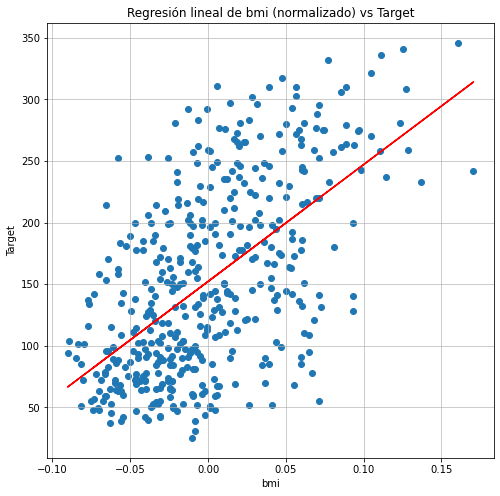

In [12]:
x_val = diabetes_X[feature]
y_val = diabetes_y

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x_val,y_val)

ax.plot(x_val,recta(x_val,regr),color="r")
# se puede hacer el mismo plot de la recta utilizando regr.predict como eje vertical
# y_pred=regr.predict(x_val.to_frame())
# ax.plot(x_val,y_pred,color="g")

ax.set(xlabel=feature, ylabel="Target",
       title='Regresión lineal de bmi (normalizado) vs Target')
ax.grid(alpha=50)

In [13]:
#Se crea un nuevo arreglo para agregarlo al DataFrame diabetes y poder plotear
y_ex=(recta(diabetes_X[feature],regr)).rename("y_pred")
diabetes_ex=pd.concat([diabetes,y_ex],axis=1)

scatter=alt.Chart(diabetes).mark_point().encode(
    x=feature,
    y="target"
)
line=alt.Chart(diabetes_ex).mark_line().encode(
    x=feature,
    y="y_pred",
    color=alt.value("red")
).properties(
    title='Regresión lineal de bmi (normalizado) vs Target'
)
scatter + line

alt.LayerChart(...)